In [13]:
from analysis import get_segs
import os
flag = "it_10_dp_10_nb_10_sd_102201_pt_10.000000"

sub_dataset = "scenenet_v2_taugh"

def one_model(model_name,flag,seg_type):
    floder = "D:/WorkData/ipsr_explore/out/{}/{}/graph_ipsr/lg_seg/".format(flag,model_name)
    # 检查文件夹是否存在
    if not os.path.exists(floder):
        print("floder not exist!")
        return None
    segs = get_segs(floder,seg_type)
    return segs

model_name_list = os.listdir(("D:\WorkData\ipsr_explore\input/{}".format(sub_dataset)))
model_name_list = [".".join(model_name.split(".")[0:-1]) for model_name in model_name_list if model_name.endswith(".ply")]

segss = []
gt_segss = []
for model_name in model_name_list[0:1]:
    segs = one_model(model_name,flag,"res")
    gt_segs = one_model(model_name, flag,"gt")
    if segs is not None:
        segss.append(segs)
        gt_segss.append(gt_segs)
    print(model_name)
print("done")



    
    

scene0000_00_vh_clean_2
done


In [14]:
allsegs = []
gt_allsegs = []
for segs in segss:
    allsegs.extend(segs)
for gt_segs in gt_segss:
    gt_allsegs.extend(gt_segs)
segs = allsegs
gt_segs = gt_allsegs
print(len(allsegs))
print(len(gt_allsegs))
print("done")


149
149
done


In [15]:
import matplotlib.pyplot as plt
import numpy as np
import field_utils
metric_name = "avg_nd_loss"

y = [field_utils.self_interaction_all(s.nxyz) for s in segs]
gt_y = [field_utils.self_interaction_all(s.nxyz) for s in gt_segs]


x = [s.metric[metric_name] for s in segs]
id = [s.id for s in segs]

Text(0, 0.5, 'self_interaction')

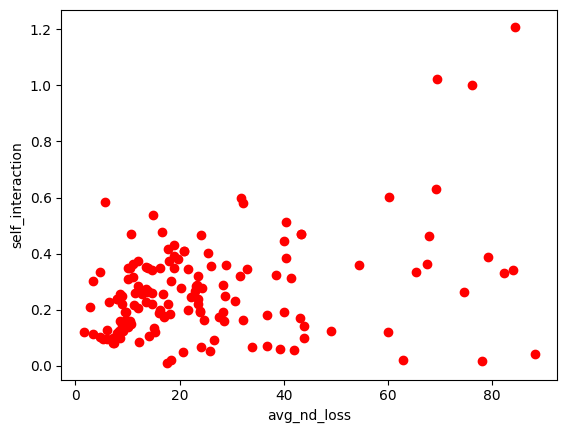

In [16]:
gt_y = np.array(gt_y)
y = np.array(y)
# plt.scatter(x, gt_y, c='b')
plt.scatter(x, abs(gt_y-y), c='r')

plt.xlabel(metric_name)
plt.ylabel('self_interaction')
# # # 在(x,y)处标注id
# # for i in range(len(id)):
# #     plt.text(x[i], y[i], id[i])
# plt.scatter(y, yy, c='g')

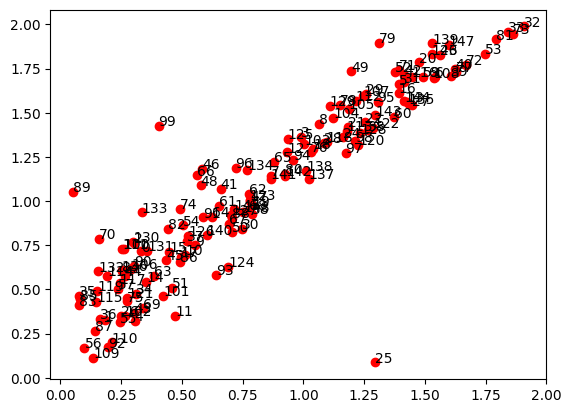

In [17]:
scatter = plt.scatter(gt_y, y, c='r')
# 在(x,y)处标注id
for i in range(len(id)):
    plt.text(gt_y[i],y[i], id[i])
